### Step 2 Import the libraries you need into a new notebook, including any necessary modules from scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
df = pd.read_csv(r'C:\Users\PC\Documents\zomato.csv', index_col = False)

### Step 3 Clean your data so that it’s ready for analysis.

Spotting Missing values

In [63]:
null_values=df.isnull().sum()

In [65]:
print(null_values[null_values > 0])

rate                            7775
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
dtype: int64


In [67]:
df.dropna(inplace = True)

In [69]:
df.shape

(23193, 17)

Looking for duplicates

In [71]:
df_dups = df[df.duplicated()]

In [73]:
df_dups

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


Renaming Columns

In [75]:
df.rename(columns = {'listed_in(type)' : 'theme'}, inplace = True)

In [77]:
df.rename(columns = {'listed_in(city)' : 'city'}, inplace = True)

In [79]:
df.rename(columns = {'approx_cost(for two people)' : 'cost'}, inplace = True)

In [81]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'theme', 'city'],
      dtype='object')

Changing Data Type

In [83]:
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

In [85]:
df['cost'] = df['cost'].astype(str)

In [87]:
df['cost'] = df['cost'].str.replace(r",", "", regex=True)
df['cost'] = df['cost'].str.extract(r"(\d+)", expand=False)

In [89]:
# Convert to numeric type (float o int)
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [91]:
# Verify the cleaning
print(df[['cost']].info())
print(df['cost'].head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cost    23193 non-null  int64
dtypes: int64(1)
memory usage: 362.4 KB
None
0     800
1     800
2     800
3     300
4     600
5     600
7     600
8     700
9     550
10    500
Name: cost, dtype: int64


In [93]:
df['rate'] = df['rate'].astype(str).str.strip()

In [95]:
df['rate'] = df['rate'].str.replace(" ", "", regex=False)

In [97]:
print(df['rate'].value_counts(dropna=False))

rate
3.9/5    3238
4.0/5    2860
4.1/5    2786
3.8/5    2473
4.2/5    2097
4.3/5    1671
3.7/5    1639
4.4/5    1123
3.6/5     875
4.5/5     630
3.5/5     482
3.4/5     351
2.8/5     315
2.9/5     309
3.1/5     307
4.6/5     294
3.0/5     291
3.2/5     249
3.3/5     218
2.7/5     190
4.7/5     167
NEW       147
2.6/5     138
4.8/5      66
2.5/5      57
4.9/5      55
2.4/5      54
2.3/5      45
2.2/5      26
2.1/5      24
2.0/5      11
1.8/5       5
Name: count, dtype: int64


In [99]:
df['rate'] = df['rate'].replace("NEW", np.nan)

In [101]:
print(df['rate'].isnull().sum())

147


In [109]:
print(df['rate'].value_counts(dropna=False))

rate
3.9/5    3238
4.0/5    2860
4.1/5    2786
3.8/5    2473
4.2/5    2097
4.3/5    1671
3.7/5    1639
4.4/5    1123
3.6/5     875
4.5/5     630
3.5/5     482
3.4/5     351
2.8/5     315
2.9/5     309
3.1/5     307
4.6/5     294
3.0/5     291
3.2/5     249
3.3/5     218
2.7/5     190
4.7/5     167
NaN       147
2.6/5     138
4.8/5      66
2.5/5      57
4.9/5      55
2.4/5      54
2.3/5      45
2.2/5      26
2.1/5      24
2.0/5      11
1.8/5       5
Name: count, dtype: int64


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           23193 non-null  object
 1   address       23193 non-null  object
 2   name          23193 non-null  object
 3   online_order  23193 non-null  object
 4   book_table    23193 non-null  object
 5   rate          23046 non-null  object
 6   votes         23193 non-null  int64 
 7   phone         23193 non-null  object
 8   location      23193 non-null  object
 9   rest_type     23193 non-null  object
 10  dish_liked    23193 non-null  object
 11  cuisines      23193 non-null  object
 12  cost          23193 non-null  int64 
 13  reviews_list  23193 non-null  object
 14  menu_item     23193 non-null  object
 15  theme         23193 non-null  object
 16  city          23193 non-null  object
dtypes: int64(2), object(15)
memory usage: 3.2+ MB


In [111]:
df['rate'] = df['rate'].str.replace("/5", "", regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

print(df['rate'].dtype)
print(df['rate'].head())

float64
0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           23193 non-null  object 
 1   address       23193 non-null  object 
 2   name          23193 non-null  object 
 3   online_order  23193 non-null  object 
 4   book_table    23193 non-null  object 
 5   rate          23046 non-null  float64
 6   votes         23193 non-null  int64  
 7   phone         23193 non-null  object 
 8   location      23193 non-null  object 
 9   rest_type     23193 non-null  object 
 10  dish_liked    23193 non-null  object 
 11  cuisines      23193 non-null  object 
 12  cost          23193 non-null  int64  
 13  reviews_list  23193 non-null  object 
 14  menu_item     23193 non-null  object 
 15  theme         23193 non-null  object 
 16  city          23193 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 3.2+ MB


### Step 4 Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

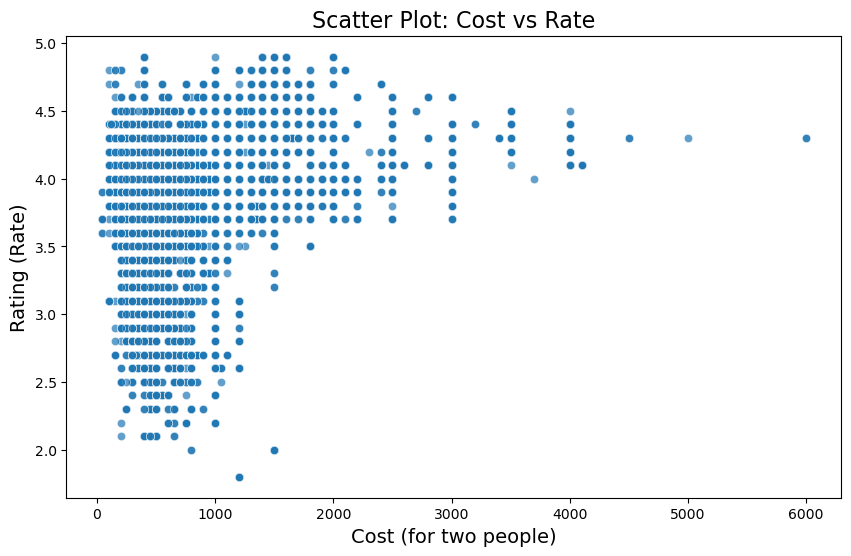

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost', y='rate', data=df, alpha=0.7)

plt.title('Scatter Plot: Cost vs Rate', fontsize=16)
plt.xlabel('Cost (for two people)', fontsize=14)
plt.ylabel('Rating (Rate)', fontsize=14)

plt.show()

### Step 5 State your hypothesis in a markdown cell within your Jupyter notebook

The scatter plot would look relatively spread out and noisy, indicating a weak predictive power of cost on the rating.

### Hypothesis:

There is no significant relationship between the cost of a restaurant and its rating (rate). The cost does not predict or influence the rating in a meaningful way.

### Step 6 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [159]:
X = df['cost'].values.reshape(-1,1)
y = df['rate'].values.reshape(-1,1)

In [161]:
X

array([[ 800],
       [ 800],
       [ 800],
       ...,
       [1200],
       [ 800],
       [2500]], dtype=int64)

In [163]:
y

array([[4.1],
       [4.1],
       [3.8],
       ...,
       [2.8],
       [2.5],
       [4.3]])

### Step 7 Split the data into two sets: a training set and a test set.

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Step 8 Run a linear regression on the data.

First, fit the model you created to the training set.

Then, create a prediction for y on the test set.

In [169]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [175]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [155]:
df = df.dropna(subset=['cost', 'rate'])

In [177]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Step 9 Create a plot that shows the regression line on the test set.

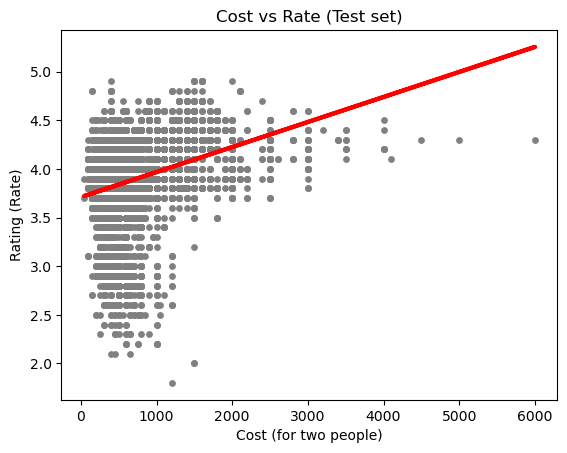

In [179]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cost vs Rate (Test set)')
plot_test.xlabel('Cost (for two people)')
plot_test.ylabel('Rating (Rate)')
plot_test.show()

### Step 10 Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The line indicates a very small positive linear relationship between cost and rate. This suggests that for every unit increase in cost, the predicted rating increases slightly, but the impact is very minor.

The model is not far off in its predictions, but it still has some room for improvement. This means that the model's predictive power is very limited.

The line could suggest that there are other factors not captured by the model that are influencing the ratings, and the relationship between cost and rate is weak.

### Step 11 Check the model performance statistics—MSE and R2 score.

In [184]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [186]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00025722]]
Mean squared error:  0.16104079587187395
R2 score:  0.10181694929991614


### Step 12 Compare the predicted y values with the actual y values in a dataframe.

In [189]:
y_predicted

array([[3.86463242],
       [3.81318784],
       [3.78746556],
       ...,
       [3.81318784],
       [3.8003267 ],
       [3.76174327]])

In [191]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.8,3.864632
1,4.0,3.813188
2,4.1,3.787466
3,4.7,3.941799
4,2.6,3.890355
5,3.8,3.813188
6,3.8,3.916077
7,3.7,3.877494
8,3.9,3.787466
9,4.1,3.838910


### Step 13 Include your thoughts on how well the model performed on the test set in a markdown cell.

Include any reflections you have on the impact of possible data bias

### Reflections on Data Bias and Impact:
### Data Bias:

It's possible that the dataset has inherent biases. For example:

Cost Bias: If higher-cost restaurants tend to be more popular or better rated, the model may mistakenly associate high cost with high ratings. Alternatively, if lower-cost restaurants are undervalued, the model might struggle to predict higher ratings for them.

Rating Bias: Ratings might be subject to user bias, where certain types of restaurants (e.g., chains vs. local spots) or certain cuisines tend to attract more favorable reviews. This could distort the relationship between cost and rating, leading the model to perform poorly.

### Impact on the Model:

The model's low R² score and limited predictive power can be a result of these biases. The relationship between cost and rating might not be as straightforward as the model assumes, and external factors like the restaurant’s popularity, location, and food type could be influencing the ratings far more than cost.

If certain restaurant types (e.g., luxury or fast food) are underrepresented in the data, the model will struggle to generalize well across all types, further exacerbating any prediction bias.

### Improving the Model:
To improve the model's performance, consider the following:

Feature Engineering: Adding additional features like restaurant type, location, or reviews count might give the model more context and better predictive power.

Data Cleaning and Preprocessing: Ensure that missing values and outliers are properly handled, as they can distort the model.

Model Complexity: A simple linear regression might not capture the complexities of the data. Trying more sophisticated models like decision trees, random forests, or gradient boosting could yield better results.

### Conclusion:
While the model provides a basic understanding of the relationship between cost and ratings, its predictive power is quite weak, as evidenced by the low R² score and MSE. The bias in the data, especially if it's skewed in terms of types of restaurants or rating practices, may contribute to the model’s poor performance. To improve the model, additional features and more advanced models should be considered.